In [1]:
# Relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model

In [2]:
# Read Data
df = pd.read_csv('forestfires.csv')

From the correlation heatmap, temperature had the highest correlation with area, so we will attempt to implement a simple Linear Regression to predict 'area' from 'temperature'

Text(0, 0.5, 'Area')

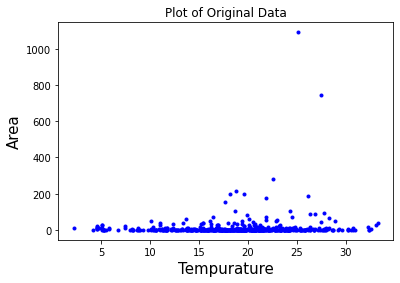

In [3]:
# Observe data with plot

temp = np.array(df['temp'])
area = np.array(df['area'])

plt.figure(figsize = (6, 4))
plt.plot(temp, area, '.b')

plt.title('Plot of Original Data')
plt.xlabel('Tempurature', size = 15)
plt.ylabel('Area', size = 15)

The data is contaminated with noise from outliers. From the plot above, we can see that many of the area values are 0 and there are two very large area values that may influence the fitted regression line.

In [4]:
# Clean the data

# Area=0
df_areazeros = df.loc[df['area'] == 0]
temp_areazeros = np.array(df_areazeros['temp'])
area_zeros = np.array(df_areazeros['area'])

# Outliers (very large area)
df_areaoutliers = df.loc[df['area'] > 600]
temp_areaoutliers = np.array(df_areaoutliers['temp'])
area_outliers = np.array(df_areaoutliers['area'])

# Inliers: What we will use as "new" dataframe to fit regression
df_areainliers = df.loc[(df['area'] > 0) &
              (df['area'] < 600)]
temp_areainliers = np.array(df_areainliers['temp'])
area_inliers = np.array(df_areainliers['area'])

# Check number of observations are accurate
n_area = len(area)
n_areazeros = len(area_zeros)
n_areaoutliers = len(area_outliers)
n_areainliers = len(area_inliers)

print("n_area =", n_area, 
      "\nn_areazeros =", n_areazeros, 
      "\nn_areaoutliers =", n_areaoutliers, 
      "\nn_areainliers =", n_areainliers)

n_area = 517 
n_areazeros = 247 
n_areaoutliers = 2 
n_areainliers = 268


Text(0, 0.5, 'Area')

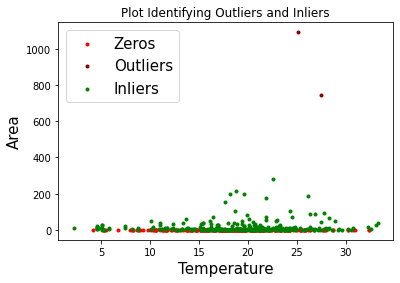

In [5]:
# Plot inliers and outliers

plt.figure(figsize = (6, 4))

plt.scatter(temp_areazeros, area_zeros, 
            marker = '.', 
            color = 'red',
            label = 'Zeros')
plt.scatter(temp_areaoutliers, area_outliers, 
            marker = '.', 
            color = 'darkred',
            label = 'Outliers')
plt.scatter(temp_areainliers, area_inliers, 
            marker = '.', 
            color = 'green',
            label = 'Inliers')

plt.legend(prop = {'size':15})

plt.title('Plot Identifying Outliers and Inliers')
plt.xlabel('Temperature', size = 15)
plt.ylabel('Area', size = 15)

Full Data Linear Regression Coefficient:  [1.07262762] 
 Full Data Linear Regression Intercept:  -7.413751564770022
Inlier Data Linear Regression Coefficient:  [0.36217826] 
 Inlier Data Linear Regression Intercept:  10.9536684219587


Text(0, 0.5, 'Area')

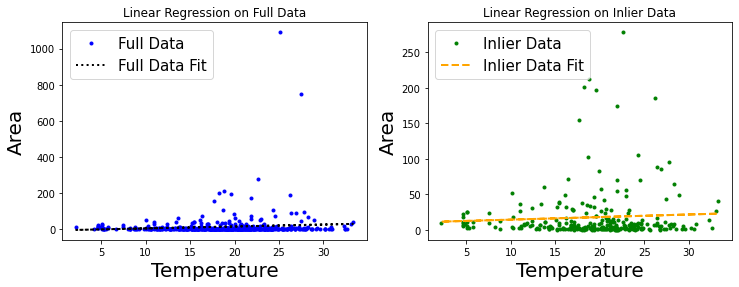

In [6]:
# Fit a linear model to full data

lr = linear_model.LinearRegression()
lr.fit(temp[:, np.newaxis], area)

print("Full Data Linear Regression Coefficient: ", lr.coef_, "\n Full Data Linear Regression Intercept: ", lr.intercept_)

# Fit a linear model to the inliers

lr_inlier = linear_model.LinearRegression()
lr_inlier.fit(temp_areainliers[:, np.newaxis], area_inliers)

print("Inlier Data Linear Regression Coefficient: ", lr_inlier.coef_, "\n Inlier Data Linear Regression Intercept: ", lr_inlier.intercept_)

# Plot both models

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)

plt.plot(temp, area, '.b', label = 'Full Data')
m, b = np.polyfit(temp, area, deg = 1)
plt.plot(temp, m*temp+b, ':k', lw = 2, label = 'Full Data Fit')

plt.legend(prop = {'size':15})

plt.title('Linear Regression on Full Data')
plt.xlabel('Temperature', size = 20)
plt.ylabel('Area', size = 20)


plt.subplot(1, 2, 2)

plt.plot(temp_areainliers, area_inliers, '.g', label = 'Inlier Data')
m_in, b_in = np.polyfit(temp_areainliers, area_inliers, deg = 1)
plt.plot(temp_areainliers, m_in*temp_areainliers+b_in, '--', color = 'orange', lw = 2, label = 'Inlier Data Fit')

plt.legend(prop = {'size':15})

plt.title('Linear Regression on Inlier Data')
plt.xlabel('Temperature', size = 20)
plt.ylabel('Area', size = 20)

$$
 \hat{Area}_{Full} = -7.414 + 1.073Temp
$$

$$
 \hat{Area}_{Inlier} = 10.954 + 0.362Temp
$$

(0.0, 80.0)

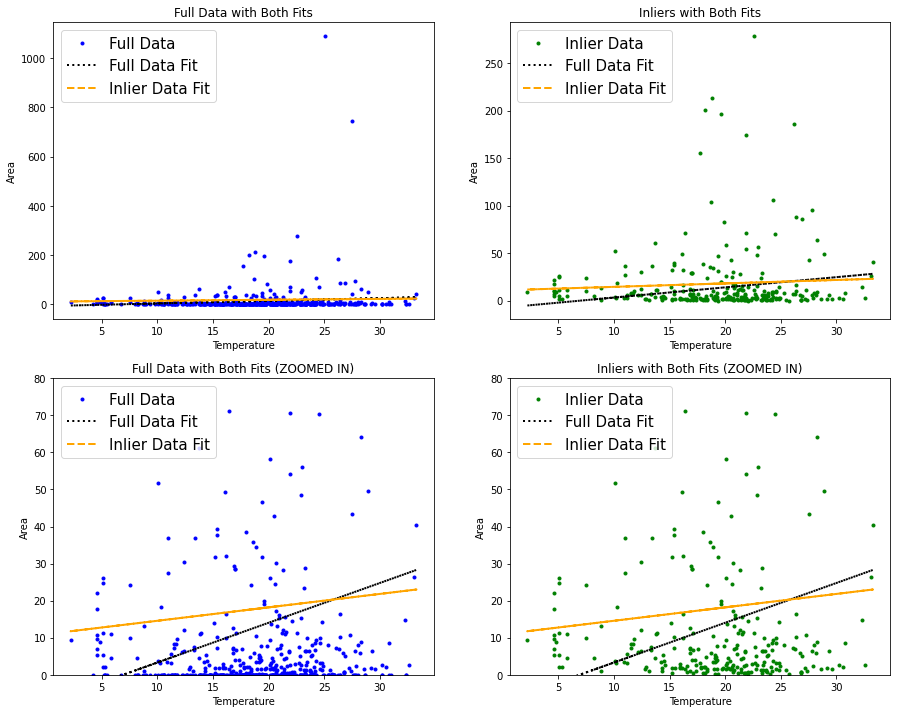

In [7]:
# Plots with both linear regressions

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 12))


ax[0,0].plot(temp, area, '.b', label = 'Full Data')
ax[0,0].plot(temp, m*temp+b, ':k', lw = 2, label = 'Full Data Fit')
ax[0,0].plot(temp_areainliers, m_in*temp_areainliers+b_in, '--', color = 'orange', lw = 2, label = 'Inlier Data Fit')

ax[0,0].legend(prop = {'size':15})

ax[0,0].set_title('Full Data with Both Fits')
ax[0,0].set_xlabel('Temperature')
ax[0,0].set_ylabel('Area')


ax[0,1].plot(temp_areainliers, area_inliers, '.g', label = 'Inlier Data')
ax[0,1].plot(temp, m*temp+b, ':k', lw = 2, label = 'Full Data Fit')
ax[0,1].plot(temp_areainliers, m_in*temp_areainliers+b_in, '--', color = 'orange', lw = 2, label = 'Inlier Data Fit')

ax[0,1].legend(prop = {'size':15})

ax[0,1].set_title('Inliers with Both Fits')
ax[0,1].set_xlabel('Temperature')
ax[0,1].set_ylabel('Area')


# Zoomed in

ax[1,0].plot(temp, area, '.b', label = 'Full Data')
ax[1,0].plot(temp, m*temp+b, ':k', lw = 2, label = 'Full Data Fit')
ax[1,0].plot(temp_areainliers, m_in*temp_areainliers+b_in, '--', color = 'orange', lw = 2, label = 'Inlier Data Fit')

ax[1,0].legend(prop = {'size':15})

ax[1,0].set_title('Full Data with Both Fits (ZOOMED IN)')
ax[1,0].set_xlabel('Temperature')
ax[1,0].set_ylabel('Area')
ax[1,0].set_ylim([0, 80])


ax[1,1].plot(temp_areainliers, area_inliers, '.g', label = 'Inlier Data')
ax[1,1].plot(temp, m*temp+b, ':k', lw = 2, label = 'Full Data Fit')
ax[1,1].plot(temp_areainliers, m_in*temp_areainliers+b_in, '--', color = 'orange', lw = 2, label = 'Inlier Data Fit')

ax[1,1].legend(prop = {'size':15})

ax[1,1].set_title('Inliers with Both Fits (ZOOMED IN)')
ax[1,1].set_xlabel('Temperature')
ax[1,1].set_ylabel('Area')
ax[1,1].set_ylim([0, 80])

MSE Equation: 

$$
 {\rm MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}
$$

In [8]:
# MSE to compare performance between regression on full data vs inlier data
from sklearn import metrics

areafull_pred = lr.predict(temp[:, np.newaxis])
mse_full = metrics.mean_squared_error(area, areafull_pred)
print("MSE of Linear Regression on Full Data: ", mse_full)

areainlier_pred = lr_inlier.predict(temp_areainliers[:, np.newaxis])
mse_inlier = metrics.mean_squared_error(area_inliers, areainlier_pred)
print("MSE of Linear Regression on Inlier Data: ", mse_inlier)

MSE of Linear Regression on Full Data:  4005.5083087693224
MSE of Linear Regression on Inlier Data:  1275.5607805506625


If we compare the Mean Squared Error of both Linear Regressions, we can see that excluding the zeros and outlier data reduces error in the regression. 

In conclusion, we can use this linear regression model to predict the area of a fire from temperature alone, given that a fire does occur (area > 0). But even with this finding, this simple linear model does not seem to be an accurate model to predict area of a forest fire. 

We will now use a Multiple Linear Regression to predict area from all 12 features on inlier data only, using training and test sets. We will then identify which features contribute the most to predicting area.

In [9]:
# Clean data
#dfclean = df_areainliers.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], 
#           ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])
#dfclean = dfclean.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], 
#                         ["1", "2", "3", "4", "5", "6", "7"])
#dfclean

dfclean = df_areainliers.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], 
           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dfclean = dfclean.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], 
                         [1, 2, 3, 4, 5, 6, 7])

In [10]:
# Identify Features and Dependent Variables
from sklearn.model_selection import train_test_split

X = np.array(dfclean.iloc[:, 0:12])
y = np.array(dfclean.loc[:, 'area'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(0.0, 50.0)

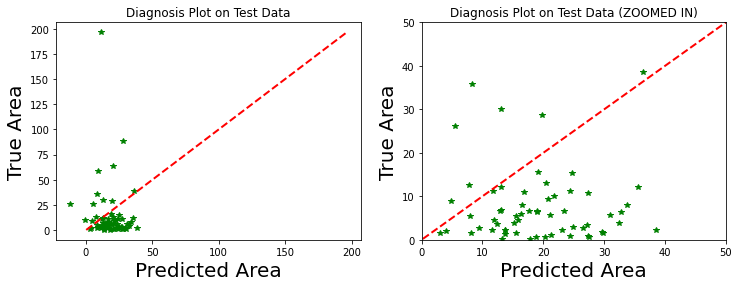

In [11]:
# Multiple Linear Regression

lr = linear_model.LinearRegression().fit(X_train, y_train)

lr_pred = lr.predict(X_test)

# Plot Predicted vs. True on Test Set

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)

plt.plot(lr_pred, y_test,'*g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Area', size = 20)
plt.ylabel('True Area', size = 20)
plt.title('Diagnosis Plot on Test Data')


plt.subplot(1, 2, 2)

plt.plot(lr_pred, y_test,'*g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Area', size = 20)
plt.ylabel('True Area', size = 20)
plt.title('Diagnosis Plot on Test Data (ZOOMED IN)')
plt.xlim([0, 50])
plt.ylim([0, 50])

(0.0, 120.0)

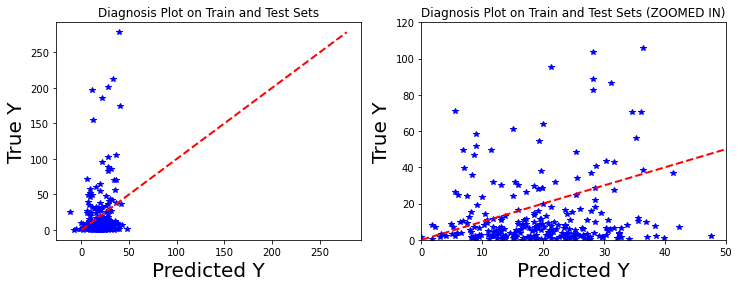

In [12]:
# Predicted vs True on Training and Test Sets

lr_pred1 = lr.predict(X)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)

plt.plot(lr_pred1, y,'*b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Predicted Y', size = 20)
plt.ylabel('True Y', size = 20)
plt.title('Diagnosis Plot on Train and Test Sets')


plt.subplot(1, 2, 2)

plt.plot(lr_pred1, y,'*b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Predicted Y', size = 20)
plt.ylabel('True Y', size = 20)
plt.title('Diagnosis Plot on Train and Test Sets (ZOOMED IN)')
plt.xlim([0, 50])
plt.ylim([0, 120])

In [28]:
# Model Evaluation with MSE

mse_lr = metrics.mean_squared_error(y_test, lr_pred)
print("MSE of Multiple Linear Regression on Inlier Data: ", mse_lr)

MSE of Multiple Linear Regression on Inlier Data:  908.4073014793332
R2 of Multiple Linear Regression on Inlier Data:  -0.21106333302761926


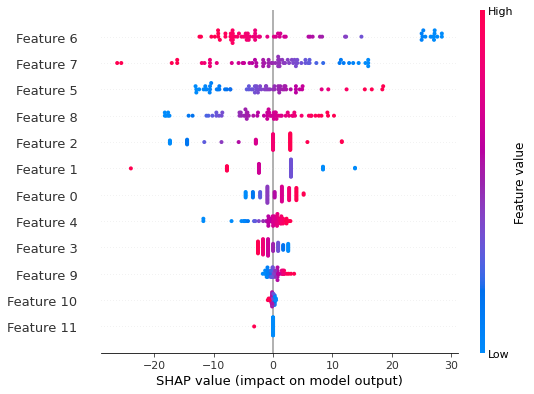

In [14]:
# SHAP
import shap

explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

To test if the data is not linear, we will use a Decision Tree Regressor to predict area from all 12 predictors on inlier data.

In [15]:
# Decision Tree Regression 
from sklearn import tree

tr = tree.DecisionTreeRegressor().fit(X_train, y_train)

Text(0.5, 1.0, 'Diagnosis Plot on Test Set')

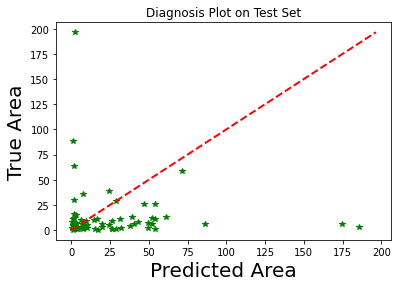

In [16]:
# Predicted vs True on Test Set
tr_pred = tr.predict(X_test)

plt.figure(figsize = (6, 4))

plt.plot(tr_pred, y_test,'*g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Area', size = 20)
plt.ylabel('True Area', size = 20)
plt.title('Diagnosis Plot on Test Set')

Text(0.5, 1.0, 'Diagnosis Plot on Train and Test Sets')

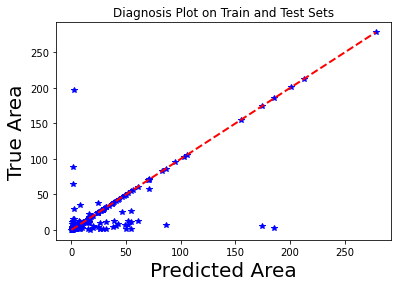

In [17]:
# Predicted vs True on Training and Test Set

tr_pred1 = tr.predict(X)

plt.figure(figsize = (6, 4))

plt.plot(tr_pred1, y,'*b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Predicted Area', size = 20)
plt.ylabel('True Area', size = 20)
plt.title('Diagnosis Plot on Train and Test Sets')

In [30]:
# Model Evaluation with MSE

mse_tr = metrics.mean_squared_error(y_test, tr_pred)
print("MSE of Decision Tree Regression on Inlier Data: ", mse_tr)

MSE of Decision Tree Regression on Inlier Data:  2173.6833014925373
R2 of Decision Tree Regression on Inlier Data:  -1.897894083155299


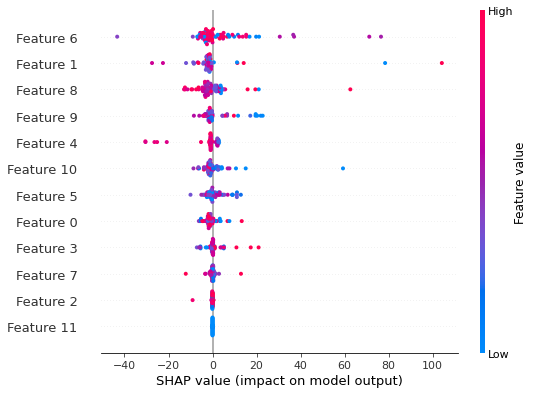

In [19]:
# SHAP 

explainer = shap.TreeExplainer(tr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

We will now use the the Random Forest Regressor to predict area from all 12 features from inlier data to hopefully create a more accurate model (Random Forest is an ensemble of Decision Trees)

Text(0.5, 1.0, 'Diagnosis Plot on Test Set')

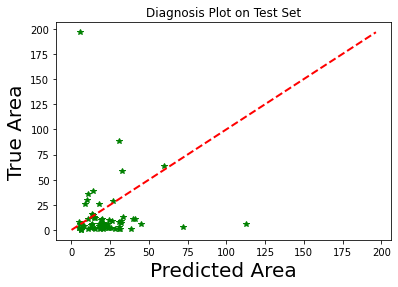

In [20]:
# Random Forest Regression
from sklearn import ensemble

rf = ensemble.RandomForestRegressor(random_state = 100).fit(X_train, y_train)

rf_pred = rf.predict(X_test)

# Predicted vs True on Test Set

plt.figure(figsize = (6, 4))

plt.plot(rf_pred, y_test,'*g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Area', size = 20)
plt.ylabel('True Area', size = 20)
plt.title('Diagnosis Plot on Test Set')

Text(0.5, 1.0, 'Diagnosis Plot on Train and Test Sets')

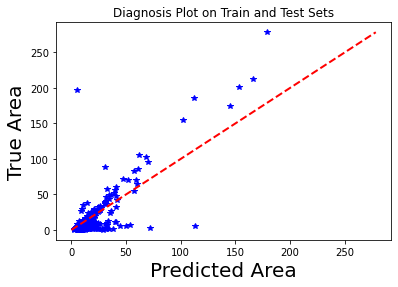

In [21]:
# Predicted vs True on Train and Test Sets

rf_pred1 = rf.predict(X)

plt.figure(figsize = (6, 4))

plt.plot(rf_pred1, y,'*b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Predicted Area', size = 20)
plt.ylabel('True Area', size = 20)
plt.title('Diagnosis Plot on Train and Test Sets')

In [31]:
# Model Evaluation with MSE

mse_rf = metrics.mean_squared_error(y_test, rf_pred)
print("MSE of Random Forest Regression on Inlier Data: ", mse_rf)

MSE of Random Forest Regression on Inlier Data:  1130.1853854218655
R2 of Random Forest Regression on Inlier Data:  -0.5067317023753009


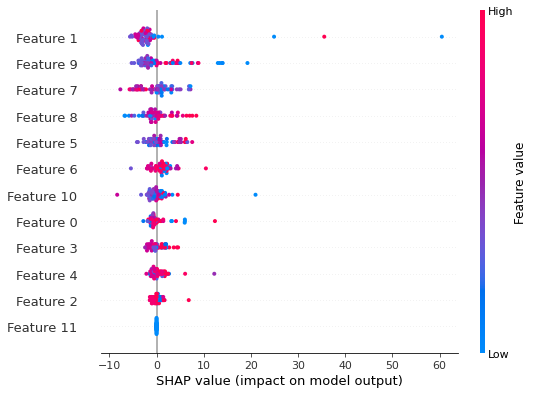

In [23]:
# SHAP 

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

From the three regression models above, we can identify the Y coordinate (Feature 1), DC (Feature 6), and RH (Feature 9) as consistent features that are relatively consistent in having high impact on prediction using regression.